In [1]:
#import/install important packages
!pip install imbalanced-learn 
!pip install --upgrade scikit-learn imbalanced-learn
import pandas as pd
from sklearn.preprocessing import RobustScaler  
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)


In [2]:
#load dataframe and display dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#Drop the least importat featres identified through EDA
features_to_drop = ['V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26']
df = df.drop(features_to_drop, axis=1)
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
Time = df["Time"]
df["Time"] = (Time - Time.min()) / (Time.max() - Time.min())
df["Time"].describe()

count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64

In [ ]:
#the data shape of amount is different so it needs to be scaled so it doesnt affect model training 
#transform into a shape that matches the rest of the variables
from sklearn.preprocessing import RobustScaler
df['Amount'] = RobustScaler().fit_transform(df['Amount'].to_numpy().reshape(-1, 1))

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


#dataset is divided into training and testing split 
#only trainnig set will be balanced testing set wll remain imblanced 

#split class from the rest of the set
X = df.drop('Class', axis=1)
y = df['Class']

#split data set using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#apply SMOTE balancing technique
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#saving new dataframes
train_df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.Series(y_train_resampled, name='Class')], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

train_df_resampled.to_csv('train_data_resampled_v2.csv', index=False)
test_df.to_csv('test_data_v2.csv', index=False)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V14,V16,V17,V18,V19,V21,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,-2.406331e-15,2.239053e-15,...,1.207294e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,1.654067e-16,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.274828,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.098632e+00,1.088850e+00,...,9.585956e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.345240e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-1.343407e+01,-2.458826e+01,...,-1.921433e+01,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-3.483038e+01,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,0.313681,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-6.430976e-01,-5.354257e-01,...,-4.255740e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.283949e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.490138,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,-5.142873e-02,-9.291738e-02,...,5.060132e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-2.945017e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.806290,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,5.971390e-01,4.539234e-01,...,4.931498e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.863772e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,1.559499e+01,2.374514e+01,...,1.052677e+01,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,2.720284e+01,3.161220e+01,3.384781e+01,358.683155,1.000000


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
df2 = pd.read_csv('train_data_resampled_v2.csv')
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V14,V16,V17,V18,V19,V21,V27,V28,Amount,Class
0,0.937075,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.406819,-0.157403,...,-0.066555,0.352514,-0.765670,0.141938,-0.451365,0.076197,0.077641,-0.032248,-0.205128,0
1,0.720386,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.045826,0.284864,...,0.721068,-0.754029,-0.270842,-0.695698,-0.274411,0.038628,0.002520,-0.069002,-0.265633,0
2,0.238385,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,0.000772,-2.009561,...,0.122746,1.123344,-0.724616,0.147255,0.004631,-2.798352,0.038049,0.185340,2.139314,0
3,0.767536,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,-1.118447,1.756121,...,-0.195288,-0.065888,0.072781,0.768237,0.257424,-0.139670,0.018045,-0.063005,-0.222176,0
4,0.343529,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.044782,-0.558955,...,0.134659,-2.096099,-0.399525,1.597589,-0.082746,-0.243245,-0.032580,-0.064194,0.895689,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,0.277638,-1.070294,3.314965,-5.016165,5.514557,-2.113600,-1.761246,-5.156619,-3.821101,-6.986847,...,-11.038123,-6.479822,-13.047820,-4.278745,0.247905,1.181820,1.274599,0.600423,-0.093729,1
454898,0.354262,-0.424540,-0.068130,1.054297,1.413302,-0.202016,0.902700,1.131564,-0.299169,-0.183114,...,-0.166667,-0.421589,0.098289,0.402138,0.973042,0.252080,-0.047760,-0.046026,3.410741,1
454899,0.620281,-1.822663,2.020546,-2.612249,2.162780,0.609591,-1.486783,-1.858739,-1.460835,-4.172283,...,-6.039327,-0.920995,-0.552078,0.373937,-0.519399,-0.287671,0.282733,0.230134,-0.246333,1
454900,0.685734,-2.496355,3.156393,-5.908389,3.730615,-0.550754,-1.967906,-2.971496,-2.054985,-4.375102,...,-8.383783,-5.470524,-5.704939,-1.594426,2.931064,1.425526,-0.175997,1.226323,-0.293850,1


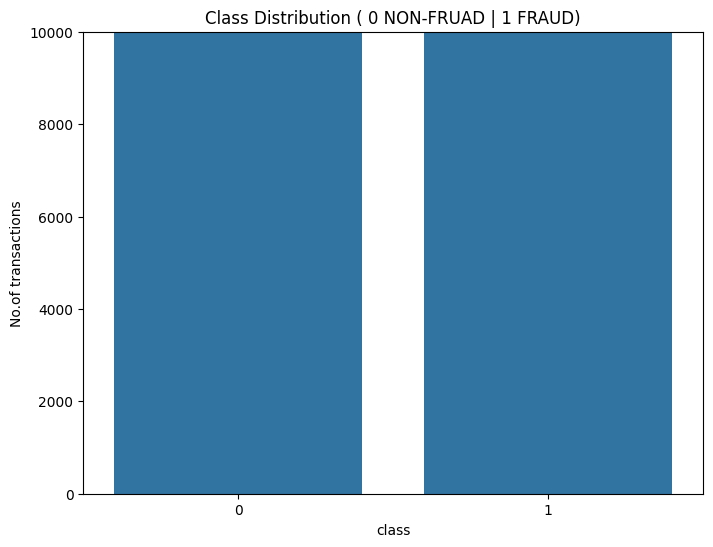

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df2)
plt.ylim(0, 10000) #limit the number of transactions to get a clearer view of the distribution 
plt.title('Class Distribution ( 0 NON-FRUAD | 1 FRAUD)')
plt.xlabel('class')
plt.ylabel('No.of transactions')
plt.show()